## Визуализация

*Подгружаем нужные библиотеки*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*Подгружаем файл*

In [3]:
df = pd.read_csv("data/auto_new.csv")
df.head(5)

,model auto,year of production,mileage,exterior colour,tax,transmission,wheel drive,number of owners,engine volume,engine power,engine type,fuel type,acceleration,MPG,country of the car brand,class,top speed,environmental class,price
0,Mercedes-Benz,2022,50.0,чёрный,17775.0,автоматическая,полный,1 владелец,2.0,237.0,дизельный,ДТ,8.5,7.2,Германия,M,214.0,Euro 6,29800000.0
1,Renault,2022,7922.0,коричневый,2900.0,механическая,полный,2 владельца,1.6,117.0,бензиновый,АИ-95,13.1,7.3,Франция,B,174.0,Euro 5,2380000.0
2,BMW,2023,30.0,синий,79500.0,автоматическая,полный,1 владелец,4.4,530.0,бензиновый,АИ-95,4.7,12.9,Германия,F,250.0,Euro 6,21900000.0
3,Renault,2013,294501.0,бежевый,2750.0,механическая,передний,2 владельца,1.5,110.0,дизельный,ДТ,11.1,4.1,Франция,C,190.0,Euro 5,670000.0
4,Renault,2017,39579.0,бежевый,984.0,механическая,передний,1 владелец,1.6,82.0,бензиновый,АИ-95,12.3,7.3,Франция,B,165.0,Euro 5,1075000.0


*Посмотрим на распределение автомобилей по году выпуска*

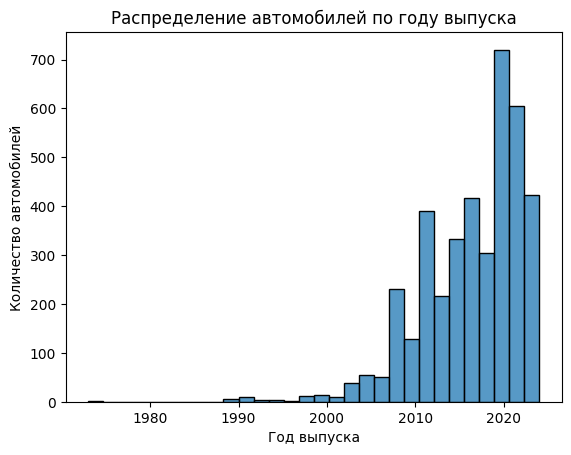

In [4]:
sns.histplot(df["year of production"], bins = 30)
plt.title("Распределение автомобилей по году выпуска")
plt.xlabel("Год выпуска")
plt.ylabel("Количество автомобилей")
plt.show()

*Можем заметить, что большая часть автомобилей, имеющихся в нашей выборке, была выпущена за последние 14 лет (2010 год и позже)*

*Построим распределение машин по маркам*

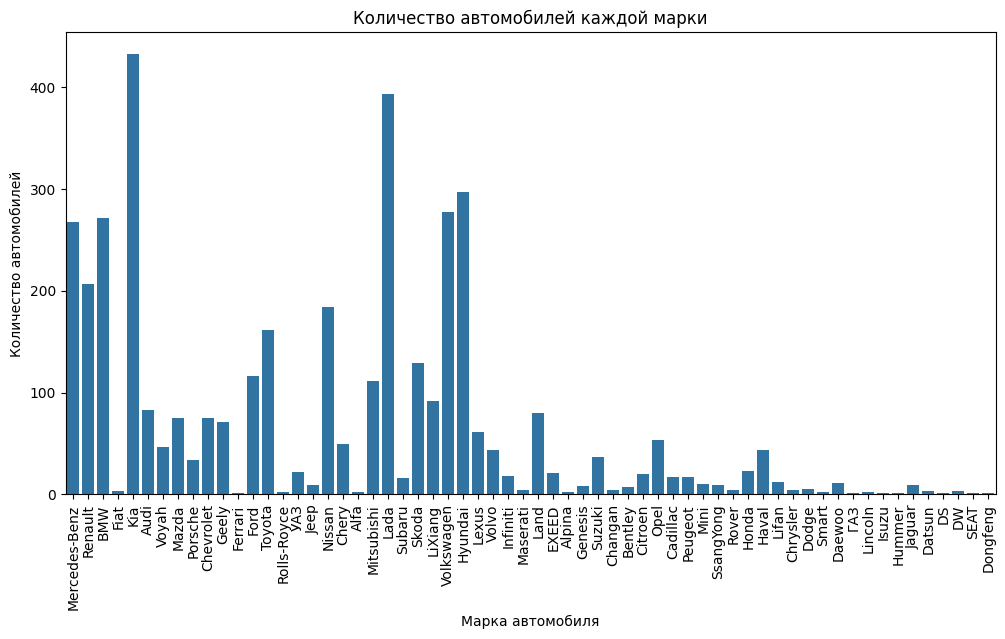

In [5]:
plt.figure(figsize = (12, 6))
sns.countplot(x = "model auto", data = df)
plt.title("Количество автомобилей каждой марки")
plt.xlabel("Марка автомобиля")
plt.ylabel("Количество автомобилей")
plt.xticks(rotation=90)
plt.show()

*Можно отметить, что лидерами по количеству представленных автомобилей являются такие марки, как Kia, Lada, Hyundai*

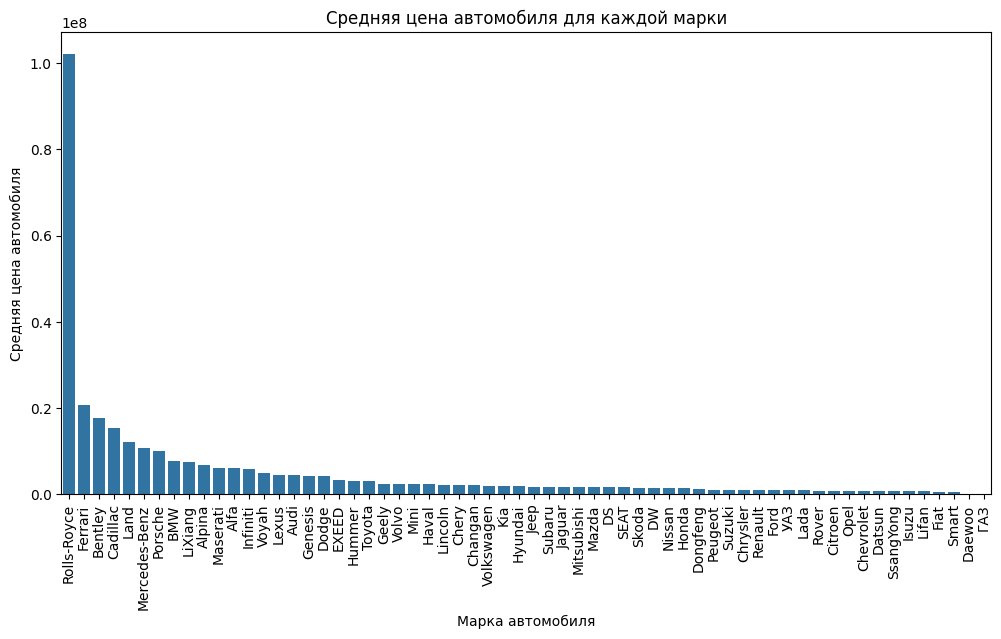

In [6]:
plt.figure(figsize = (12, 6))
average_prices = df.groupby("model auto")["price"].mean().sort_values(ascending = False)
sns.barplot(x = average_prices.index, y = average_prices.values)
plt.title("Средняя цена автомобиля для каждой марки")
plt.xlabel("Марка автомобиля")
plt.ylabel("Средняя цена автомобиля")
plt.xticks(rotation=90)
plt.show()

*Медианные цены двух из трех лидеров по количеству представленных автомобилей (Kia, Hyundai) расположены практически посередине построенного нами отрезка, то есть можно сделать вывод, что эти автомобили не только имеются в достатке на рынке, но и продаются по умеренным ценам*

*Сгруппируем машины по годам их выпуска, возьмем среднюю цену за каждый год и построим график*

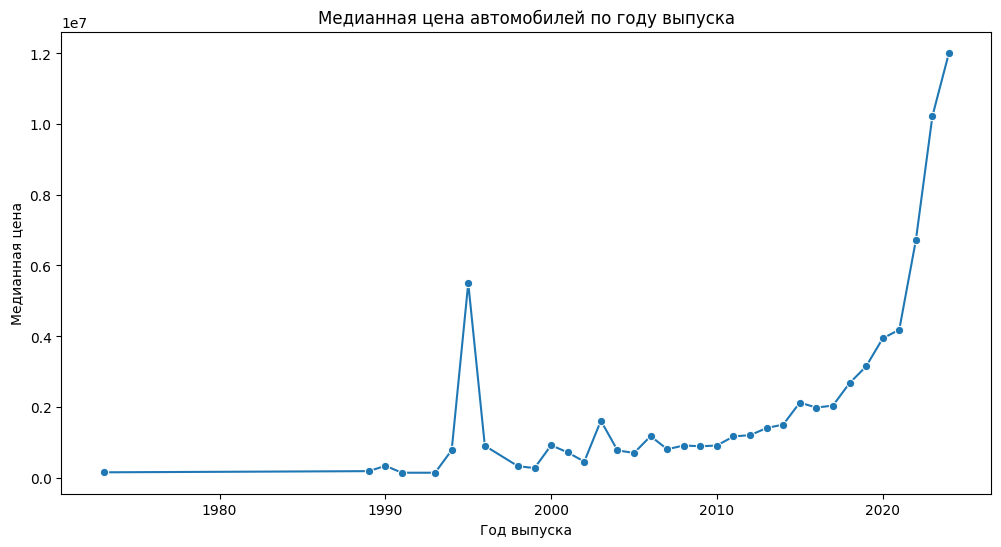

In [7]:
plt.figure(figsize = (12, 6))
mean_prices = df.groupby("year of production")["price"].mean().reset_index()
sns.lineplot(data = mean_prices, x = "year of production", y = "price", marker = 'o')
plt.title("Медианная цена автомобилей по году выпуска")
plt.xlabel("Год выпуска")
plt.ylabel("Медианная цена")
plt.show()

In [8]:
df[df["year of production"] == 1995]

,model auto,year of production,mileage,exterior colour,tax,transmission,wheel drive,number of owners,engine volume,engine power,engine type,fuel type,acceleration,MPG,country of the car brand,class,top speed,environmental class,price
870,Toyota,1995,150000.0,чёрный,14560.0,механическая,задний,3 или более,3.0,225.0,бензиновый,АИ-95,7.2,10.7,Япония,S,241.0,Euro 0,5500000.0


*В среднем наблюдается очевидный вывод: чем старше автомобиль, тем ниже его цена, но также нельзя не отметить скачок медианной цены автомобилей, выпущенных после 2021 года. Медианная цена автомобилей выпущенных в 1995 году, особенно выделяется, вероятно, из-за выставленного на продажу раритетного автомобиля в хорошем состоянии, что обусловило его высокую цену*

*Также попробуем посмотреть на то, как ведет себя цена на автомобиль в зависимости от его пробега*

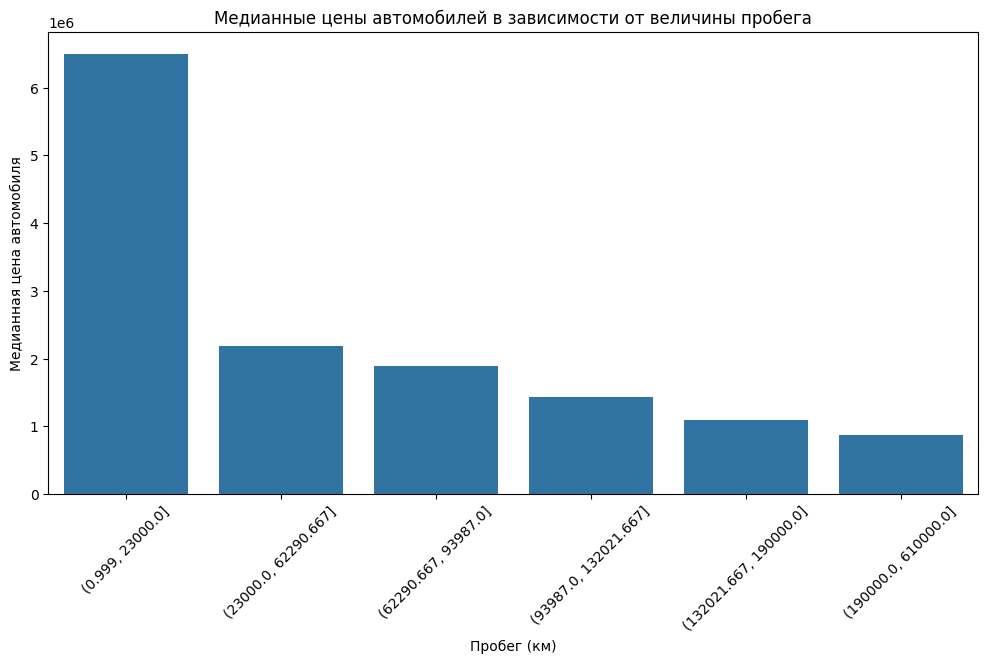

In [9]:
df["Quantile"] = pd.qcut(df["mileage"], q = 6)
median_price_by_quantile = df.groupby("Quantile", observed = False)["price"].median().reset_index()

plt.figure(figsize = (12, 6))
sns.barplot(data = median_price_by_quantile, x = "Quantile", y = "price")
plt.title("Медианные цены автомобилей в зависимости от величины пробега")
plt.xlabel("Пробег (км)")
plt.ylabel("Медианная цена автомобиля")
plt.xticks(rotation=45)
plt.show()

*С увеличением пробега уменьшается медианная цена автомобилей, также можно заметить, что при пробеге от 23000 км наблюдается более плавное снижение медианной цены автомобилей*

*Посмотрим на распределение цены автомобиля в зависимости от его класса*

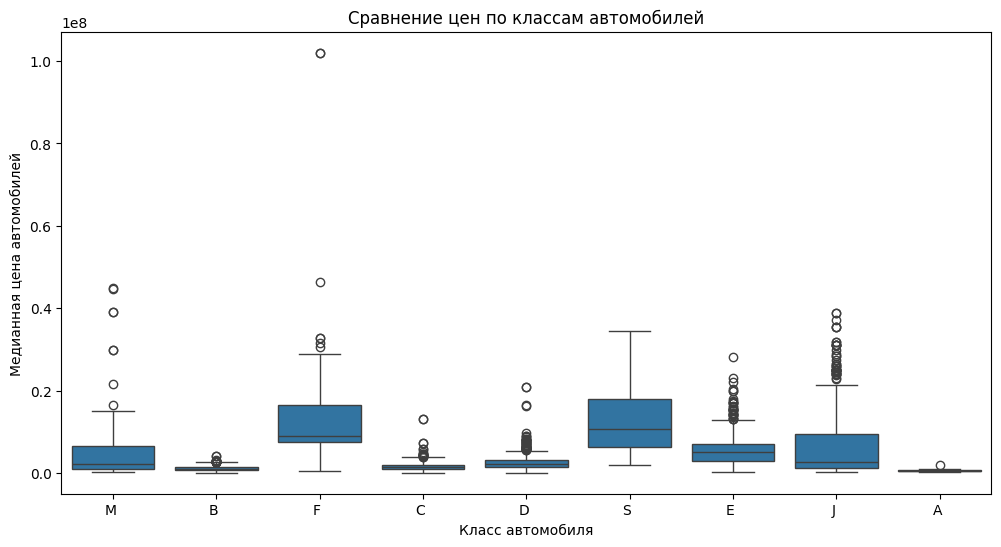

In [10]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = "class", y = "price", data = df)
plt.title("Сравнение цен по классам автомобилей")
plt.xlabel("Класс автомобиля")
plt.ylabel("Медианная цена автомобилей")
plt.show()

*Видим, что есть достаточно большой разброс цен и много выбросов, поэтому добавим ещё один признак, по которому будем смотреть цену - это <u>страна-производитель</u>*

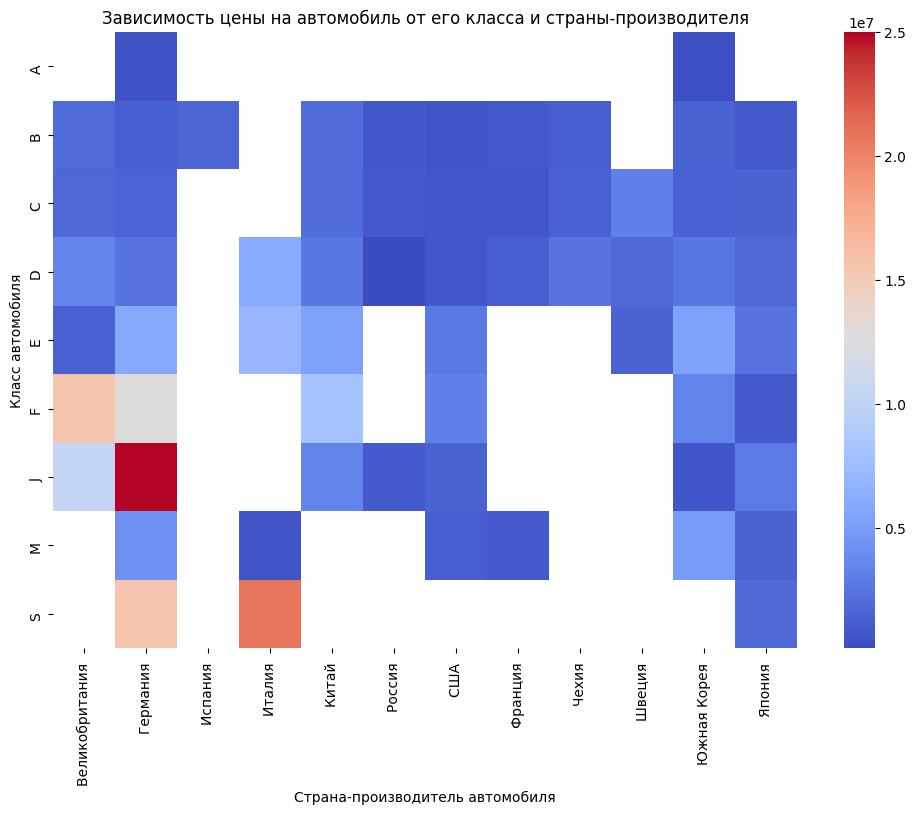

In [11]:
pivot = df.pivot_table(index = "class", columns = "country of the car brand", values = "price", aggfunc = "median")

plt.figure(figsize = (12, 8))
sns.heatmap(pivot, cmap = "coolwarm")
plt.title("Зависимость цены на автомобиль от его класса и страны-производителя")
plt.xlabel("Страна-производитель автомобиля")
plt.ylabel("Класс автомобиля")
plt.show()

<br>*Автомобили наиболее разнородного ценового сегмента представлены от страны-производителя Германии, в то же время только Германия из имеющихся стран-производителей выпускает автомобили всех классов</br><br>Достаточно однородны по цене автомобили, выпущенные в США, в то же время они также охватывают большую часть классов автомобилей</br><br>Автомобили наименьшего количества классов представлены от Чехии и Швеции (по 3 класса). Не так много стран охватывают премиальный сегмент (F, S), так, автомобили S-класса выпущены только 3 странами (Германия, Италия, Япония)</br>*

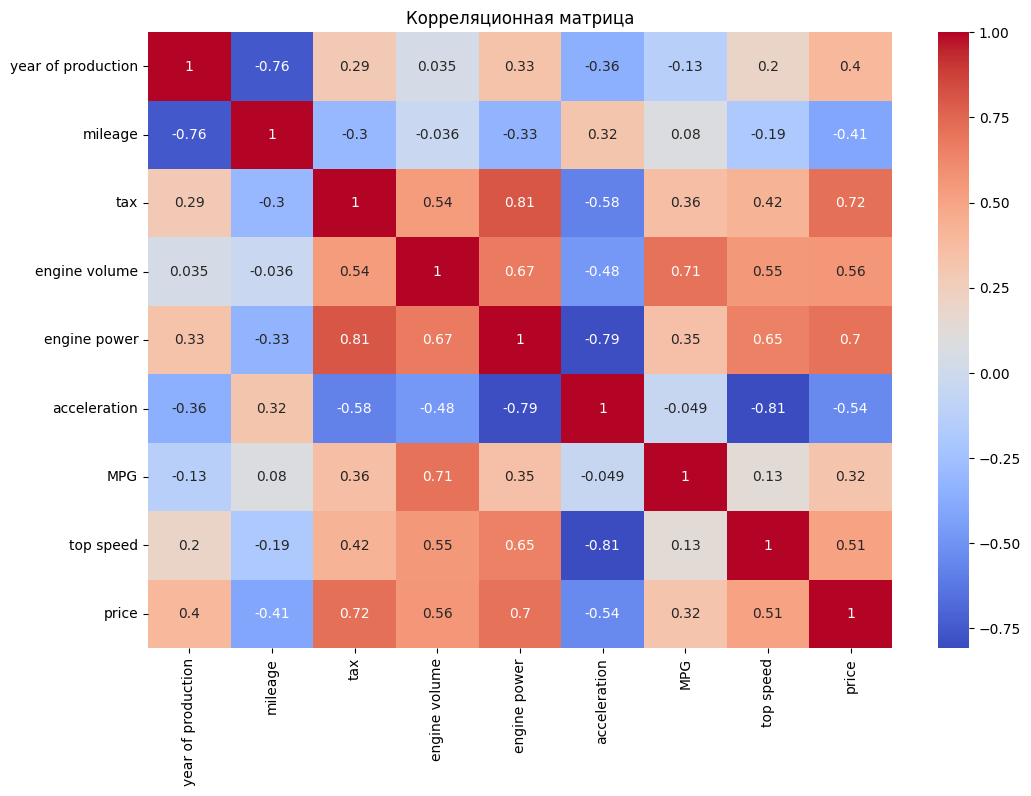

In [12]:
cat_features_mask = (df.dtypes == "object").values
X_real = df[df.columns[~cat_features_mask][:-1]]

corr_matrix = X_real.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()

*Будем анализировать коэффициенты корреляции в соответствии со шкалой Чеддока. Так, наблюдается заметная связь между налогом на автомобиль и мощностью двигателя автомобиля (0,81). Время разгона автомобиля до 100 км/ч имеет заметную отрицательную зависимость от максимальной скорости автомобиля и мощности его двигателя: чем больше мощность двигателя и максимальная скорость автомобиля, тем меньше его время разгона до 100 км/ч. Кроме того, заметную связь также можно выявить между ценой и мощностью двигателя (0,7)*

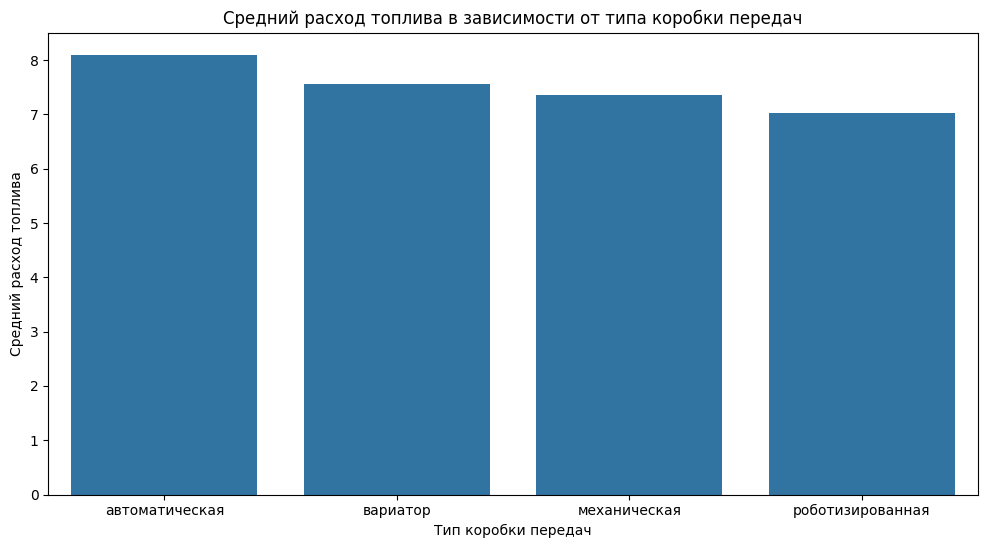

In [13]:
transmission_price = df.groupby("transmission")["MPG"].mean().reset_index()

plt.figure(figsize = (12, 6))
sns.barplot(x = "transmission", y = "MPG", data = transmission_price)
plt.title("Средний расход топлива в зависимости от типа коробки передач")
plt.xlabel("Тип коробки передач")
plt.ylabel("Средний расход топлива")
plt.show()


*Наибольший средний расход топлива характерен для автоматической коробки передач, наименьший - для роботизированной коробки передач*

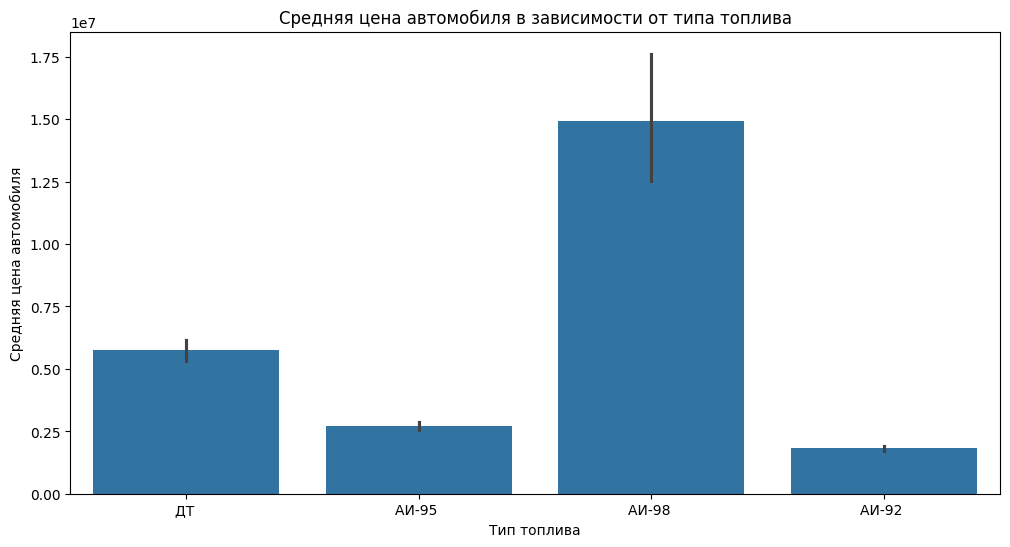

In [14]:
plt.figure(figsize = (12, 6))
sns.barplot(x = "fuel type", y = "price", data = df, estimator = np.mean)
plt.title("Средняя цена автомобиля в зависимости от типа топлива")
plt.xlabel("Тип топлива")
plt.ylabel("Средняя цена автомобиля")
plt.show()

*Средняя цена автомобилей, которые заправляются дизельным топливом, составляет примерно 5,8 млн рублей, в свою очередь средняя цена автомобилей, которые заправляются топливом АИ-98 больше в 2,5 раза*

*В среднем автомобили, которые заправляются топливом АИ-98, стоят значительно дороже, чем автомобили, которые заправляется топливом АИ-92, АИ-95 и дизельным топливом*

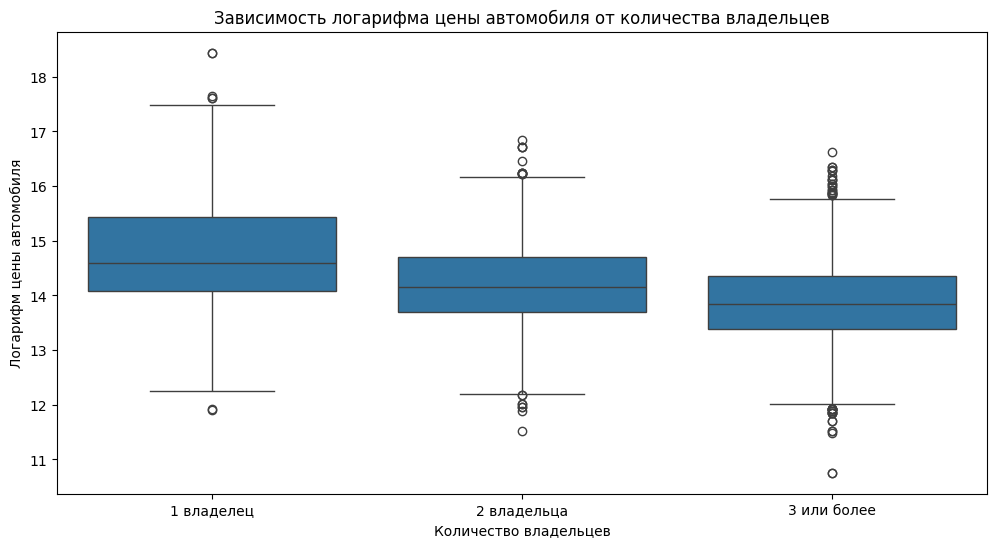

In [20]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = "number of owners", y = np.log(df["price"]), data = df)
plt.title("Зависимость логарифма цены автомобиля от количества владельцев")
plt.xlabel("Количество владельцев")
plt.ylabel("Логарифм цены автомобиля")
plt.show()

*Очевидно, при увеличении количества владельцев автомобиля цена на него уменьшается*

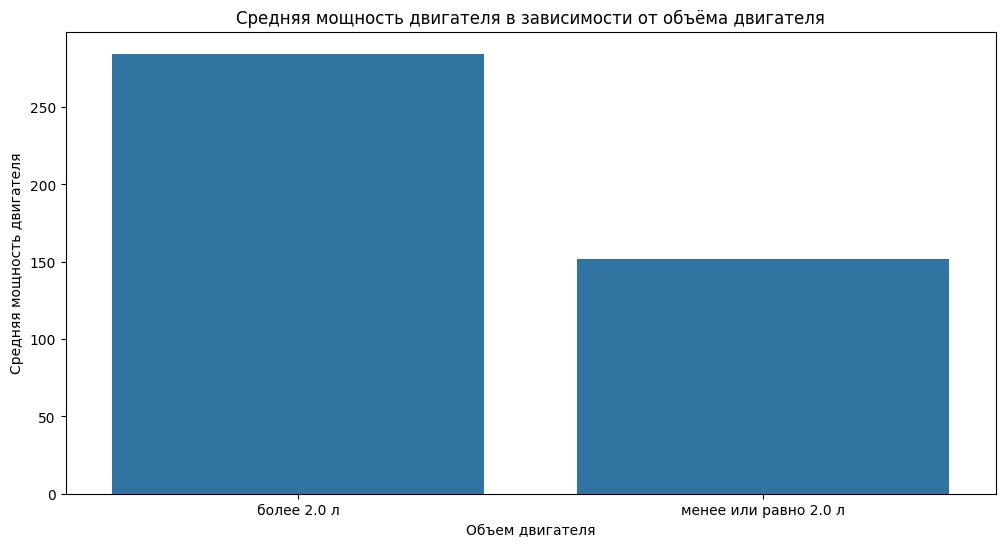

In [21]:
df["engine_volume_category"] = np.where(df["engine volume"] > 2.0, "более 2.0 л", "менее или равно 2.0 л")

engine_power_comparison = df.groupby("engine_volume_category")["engine power"].mean().reset_index()

plt.figure(figsize = (12, 6))
sns.barplot(x = "engine_volume_category", y = "engine power", data = engine_power_comparison)
plt.title("Средняя мощность двигателя в зависимости от объёма двигателя")
plt.xlabel("Объем двигателя")
plt.ylabel("Средняя мощность двигателя")
plt.show()

*Мощность двигателя автомобилей с объемом двигателя более 2.0 литров в среднем больше мощности двигателя автомобилей с объемом двигателя менее 2.0 литров на 80%*

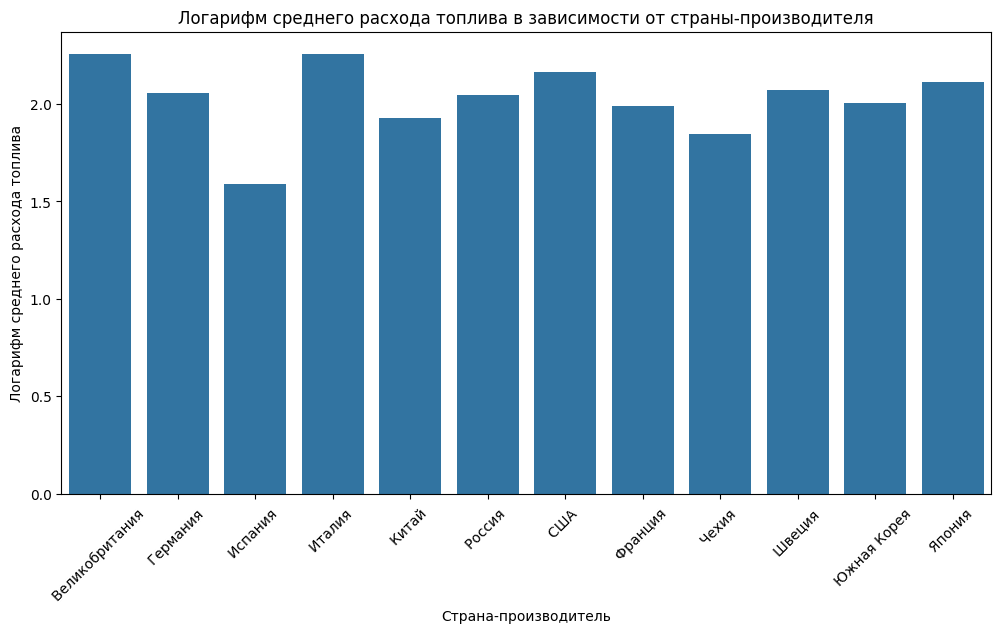

In [17]:
average_mpg_by_country = df.groupby("country of the car brand")["MPG"].mean().reset_index()

plt.figure(figsize = (12, 6))
sns.barplot(x = "country of the car brand", y = np.log(average_mpg_by_country["MPG"]), data = average_mpg_by_country)
plt.title("Логарифм среднего расхода топлива в зависимости от страны-производителя")
plt.xlabel("Страна-производитель")
plt.ylabel("Логарифм среднего расхода топлива")
plt.xticks(rotation=45)
plt.show()

In [22]:
average_mpg_by_country

,country of the car brand,MPG
0,Великобритания,9.571429
1,Германия,7.823660
2,Испания,4.900000
3,Италия,9.530000
4,Китай,6.891906
5,Россия,7.738186
6,США,8.702402
7,Франция,7.319592
8,Чехия,6.319380
9,Швеция,7.952273


*Максимальный средний расход топлива характерен для Великобритании, почти на том же уровне средний расход топлива у итальянских автомобилей, в то время как средний расход топлива у испанских автомобилей на 40% меньше соответствующих показателей автомобилей из Великобритании и Италии*

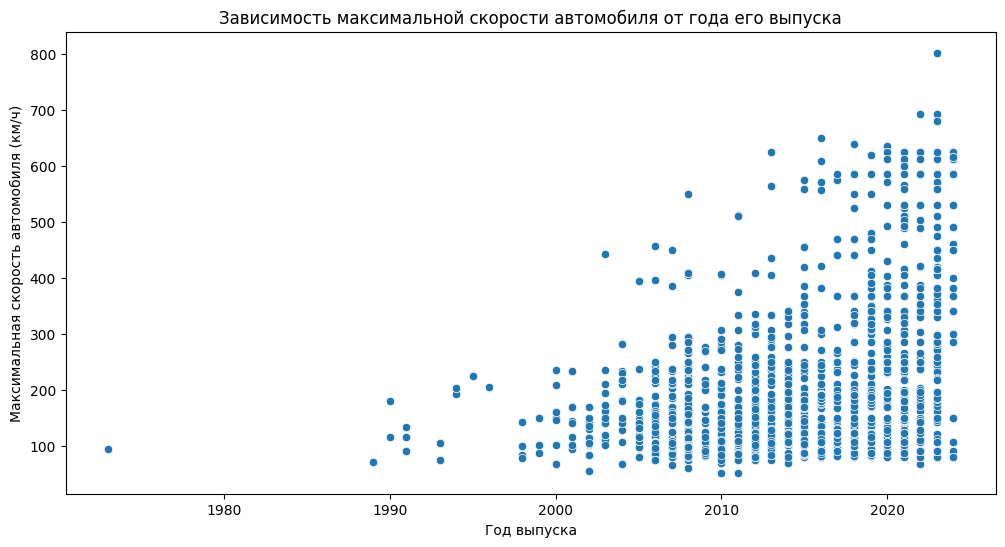

In [23]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x = "year of production", y = "engine power", data = df)
plt.title("Зависимость максимальной скорости автомобиля от года его выпуска")
plt.xlabel("Год выпуска")
plt.ylabel("Максимальная скорость автомобиля (км/ч)")
plt.show()

*Можно сделать вывод, что с увеличением года выпуска автомобиля также растет максимальная скорость, которую автомобиль может достигать. Особенно заметен скачок в 2004-2005 гг*

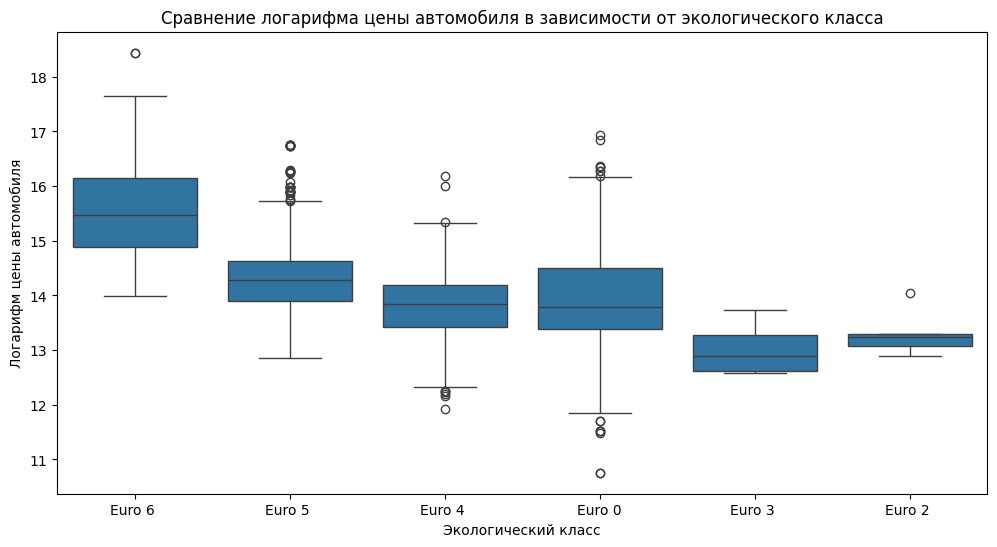

In [27]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = "environmental class", y = np.log(df["price"]), data = df)
plt.title("Сравнение логарифма цены автомобиля в зависимости от экологического класса")
plt.xlabel("Экологический класс")
plt.ylabel("Логарифм цены автомобиля")
plt.show()

In [33]:
df["environmental class"].value_counts()

environmental class
Euro 5     1550
Euro 6      944
Euro 0      923
Euro 4      530
Euro 3       12
Euro 2        7
Name: count, dtype: int64

*В среднем автомобили экологического класса Euro 6 стоят выше, чем автомобили других экологических классов.
Автомобили экологических классов Euro 3 и Euro 2 по графику дешевле других автомобилей, однако крайне важно отметить, что в нашей выборке было мало автомобилей данных классов (12 и 7 соответственно), в связи с чем выводы с опорой на эти экологические классы делать нельзя*